In [17]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.18.0
2.0.2


In [18]:
!ls

보  바위  가위	sample_data  가위-samples.zip  바위-samples.zip  보-samples.zip


In [16]:
!unzip 가위-samples.zip -d 가위
!unzip 바위-samples.zip -d 바위
!unzip 보-samples.zip   -d 보

Archive:  가위-samples.zip
replace 가위/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  바위-samples.zip
 extracting: 바위/0.jpg            
 extracting: 바위/1.jpg            
 extracting: 바위/2.jpg            
 extracting: 바위/3.jpg            
 extracting: 바위/4.jpg            
 extracting: 바위/5.jpg            
 extracting: 바위/6.jpg            
 extracting: 바위/7.jpg            
 extracting: 바위/8.jpg            
 extracting: 바위/9.jpg            
 extracting: 바위/10.jpg           
 extracting: 바위/11.jpg           
 extracting: 바위/12.jpg           
 extracting: 바위/13.jpg           
 extracting: 바위/14.jpg           
 extracting: 바위/15.jpg           
 extracting: 바위/16.jpg           
 extracting: 바위/17.jpg           
 extracting: 바위/18.jpg           
 extracting: 바위/19.jpg           
 extracting: 바위/20.jpg           
 extracting: 바위/21.jpg           
 extracting: 바위/22.jpg           
 extracting: 바위/23.jpg           
 extracting: 바위/24.jpg           
 extracting: 바위/25.jpg           
 extra

In [19]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [20]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽음
image_dir_path = "./가위"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

117  images to be resized.
117  images resized.
가위 이미지 resize 완료!


In [21]:
image_dir_path = "./바위"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = "./보"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

108  images to be resized.
108  images resized.
바위 이미지 resize 완료!
103  images to be resized.
103  images resized.
보 이미지 resize 완료!


In [22]:
import numpy as np

# 셔플 함수
from sklearn.utils import shuffle

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    # 데이터의 개수 자동 조정
    all_images = glob.glob(f'./가위/*.jpg') + \
                 glob.glob(f'./바위/*.jpg') + \
                 glob.glob(f'./보/*.jpg')
    number_of_data = len(all_images)

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)



    idx=0
    for file in glob.iglob('./가위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./바위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob('./보/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "."
(x_train, y_train)=load_data(image_dir_path)

x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 328 입니다.
x_train shape: (328, 28, 28, 3)
y_train shape: (328,)


라벨:  1


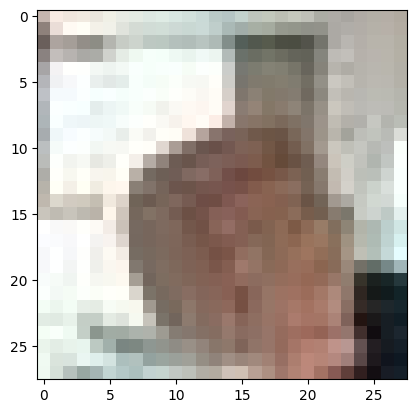

In [23]:
import matplotlib.pyplot as plt

plt.imshow(x_train[224])
print('라벨: ', y_train[224])

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

# 하이퍼파라미터 조정
n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 30

model = keras.models.Sequential()
model.add(layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(n_dense, activation='relu'))
model.add(layers.Dropout(0.5))  # 과적합 방지를 위한 드롭아웃
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,707 (877.76 KB)

 Trainable params: 224,707 (877.76 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3942 - loss: 35.2655
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6241 - loss: 2.6813
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7661 - loss: 0.6785
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8139 - loss: 0.5342
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8929 - loss: 0.2502
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9180 - loss: 0.2387
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9412 - loss: 0.1452
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9637 - loss: 0.0995
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9823 - loss: 0.0483
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9740 - loss: 0.0573
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9971 - loss: 0.0330
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy

In [36]:
ls

보/           가위_test/        가위_test-samples.zip  보_test-samples.zip
바위/         바위_test/        바위-samples.zip
가위/         보_test/          바위_test-samples.zip
sample_data/  가위-samples.zip  보-samples.zip


In [29]:
!unzip 가위_test-samples.zip -d 가위_test
!unzip 바위_test-samples.zip -d 바위_test
!unzip 보_test-samples.zip   -d 보_test

Archive:  가위_test-samples.zip
 extracting: 가위_test/0.jpg       
 extracting: 가위_test/1.jpg       
 extracting: 가위_test/2.jpg       
 extracting: 가위_test/3.jpg       
 extracting: 가위_test/4.jpg       
 extracting: 가위_test/5.jpg       
 extracting: 가위_test/6.jpg       
 extracting: 가위_test/7.jpg       
 extracting: 가위_test/8.jpg       
 extracting: 가위_test/9.jpg       
 extracting: 가위_test/10.jpg      
 extracting: 가위_test/11.jpg      
 extracting: 가위_test/12.jpg      
 extracting: 가위_test/13.jpg      
 extracting: 가위_test/14.jpg      
 extracting: 가위_test/15.jpg      
 extracting: 가위_test/16.jpg      
 extracting: 가위_test/17.jpg      
 extracting: 가위_test/18.jpg      
 extracting: 가위_test/19.jpg      
 extracting: 가위_test/20.jpg      
 extracting: 가위_test/21.jpg      
 extracting: 가위_test/22.jpg      
 extracting: 가위_test/23.jpg      
 extracting: 가위_test/24.jpg      
 extracting: 가위_test/25.jpg      
 extracting: 가위_test/26.jpg      
 extracting: 가위_test/27.jpg      
 extracting: 가위_

In [37]:
import numpy as np
from sklearn.utils import shuffle

def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    # 데이터의 개수 자동 조정
    all_images = glob.glob(f'./가위_test/*.jpg') + \
                 glob.glob(f'./바위_test/*.jpg') + \
                 glob.glob(f'./보_test/*.jpg')
    number_of_data = len(all_images)

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)



    idx=0
    for file in glob.iglob('./가위_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./바위_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob('./보_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "."
(x_train, y_train)=load_data(image_dir_path)

x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 328 입니다.
x_test shape: (328, 28, 28, 3)
y_test shape: (328,)


In [31]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 유사
image_dir_path = "./가위_test"
resize_images(image_dir_path)

image_dir_path = "./바위_test"
resize_images(image_dir_path)

image_dir_path = "./보_test"
resize_images(image_dir_path)

image_dir_path = "."
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [38]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 29ms/step - accuracy: 0.3333 - loss: 9.3061
test_loss: 9.306074142456055 
test_accuracy: 0.3333333432674408


라벨:  0


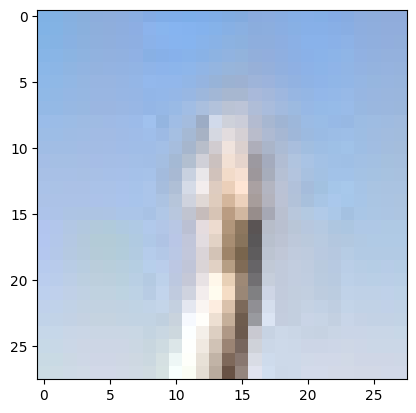

In [33]:
plt.imshow(x_test[10])
print('라벨: ', y_test[10])

- 계속 해도 0.33%이 안 넘는다...
- 트레인 셋이 적은 이유인걸까? 아마 그래서 과적합이 된 것 같다고 판단
- 혹시 모르니 다른 데이터셋을 가져와서 시도해보자.

In [39]:
ls

보/           가위_test/        가위_test-samples-1.zip  바위_test-samples.zip
바위/         바위_test/        가위_test-samples.zip    보-samples.zip
가위/         보_test/          바위-samples.zip         보_test-samples-1.zip
sample_data/  가위-samples.zip  바위_test-samples-1.zip  보_test-samples.zip


In [40]:
!unzip 가위_test-samples-1.zip -d 가위_test_1
!unzip 바위_test-samples-1.zip -d 바위_test_1
!unzip 보_test-samples-1.zip   -d 보_test_1

Archive:  가위_test-samples-1.zip
 extracting: 가위_test_1/0.jpg     
 extracting: 가위_test_1/1.jpg     
 extracting: 가위_test_1/2.jpg     
 extracting: 가위_test_1/3.jpg     
 extracting: 가위_test_1/4.jpg     
 extracting: 가위_test_1/5.jpg     
 extracting: 가위_test_1/6.jpg     
 extracting: 가위_test_1/7.jpg     
 extracting: 가위_test_1/8.jpg     
 extracting: 가위_test_1/9.jpg     
 extracting: 가위_test_1/10.jpg    
 extracting: 가위_test_1/11.jpg    
 extracting: 가위_test_1/12.jpg    
 extracting: 가위_test_1/13.jpg    
 extracting: 가위_test_1/14.jpg    
 extracting: 가위_test_1/15.jpg    
 extracting: 가위_test_1/16.jpg    
 extracting: 가위_test_1/17.jpg    
 extracting: 가위_test_1/18.jpg    
 extracting: 가위_test_1/19.jpg    
 extracting: 가위_test_1/20.jpg    
 extracting: 가위_test_1/21.jpg    
 extracting: 가위_test_1/22.jpg    
 extracting: 가위_test_1/23.jpg    
 extracting: 가위_test_1/24.jpg    
 extracting: 가위_test_1/25.jpg    
 extracting: 가위_test_1/26.jpg    
 extracting: 가위_test_1/27.jpg    
 extracting: 가

In [41]:
import numpy as np
from sklearn.utils import shuffle

def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    # 데이터의 개수 자동 조정
    all_images = glob.glob(f'./가위_test/*.jpg') + \
                 glob.glob(f'./바위_test/*.jpg') + \
                 glob.glob(f'./보_test/*.jpg')
    number_of_data = len(all_images)

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)



    idx=0
    for file in glob.iglob('./가위_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./바위_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob('./보_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "."
(x_train, y_train)=load_data(image_dir_path)

x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 328 입니다.
x_test shape: (328, 28, 28, 3)
y_test shape: (328,)


In [42]:
image_dir_path = "./가위_test"
resize_images(image_dir_path)

image_dir_path = "./바위_test"
resize_images(image_dir_path)

image_dir_path = "./보_test"
resize_images(image_dir_path)

image_dir_path = "."
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [43]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 19ms/step - accuracy: 0.3333 - loss: 9.3196
test_loss: 9.319622993469238 
test_accuracy: 0.3333333432674408


파라미터 조정 + 데이터셋 다양하게 해봄으로써 오버피팅 극복을 해보려고 했으나 실패한걸로...